# Produce grid of monthly Pb fields

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import matplotlib
import xarray as xr
import glob

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179
jsize=jmax-jmin
isize=imax-imin

# Resolution of grid cells to show in figure:
grid_reso  = 10

land_color  = '#a9a7a2'

In [3]:
month_list = ['Jan.','Feb.','Mar.','Apr.','May','June','July', 'Aug.', 'Sep.','Oct.','Nov.', 'Dec.']

#### Load files:

In [4]:
mfile        = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc')
mesh_lon     = mfile['nav_lon'].values
mesh_lat     = mfile['nav_lat'].values
mask         = mfile['tmask'].values[0]
mesh_bathy   = mfile['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = mfile['nav_lev'].values

#### Functions

In [5]:
def plot_layer(ax, variable, layer, vmin=0, vmax=30, month=''):
    
    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax])
    
    CB = proj1.pcolormesh(x, y, variable[layer,:,:]*1e12, cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax, ax=ax) 
   
    proj1.contourf(x, y, bathy_masked[layer,imin:imax,jmin:jmax], colors=[land_color], zorder=2, ax=ax) # Mask land at particular depth

    ax.set_title(f'{month}', fontsize=6)
    return CB

#### Figure:

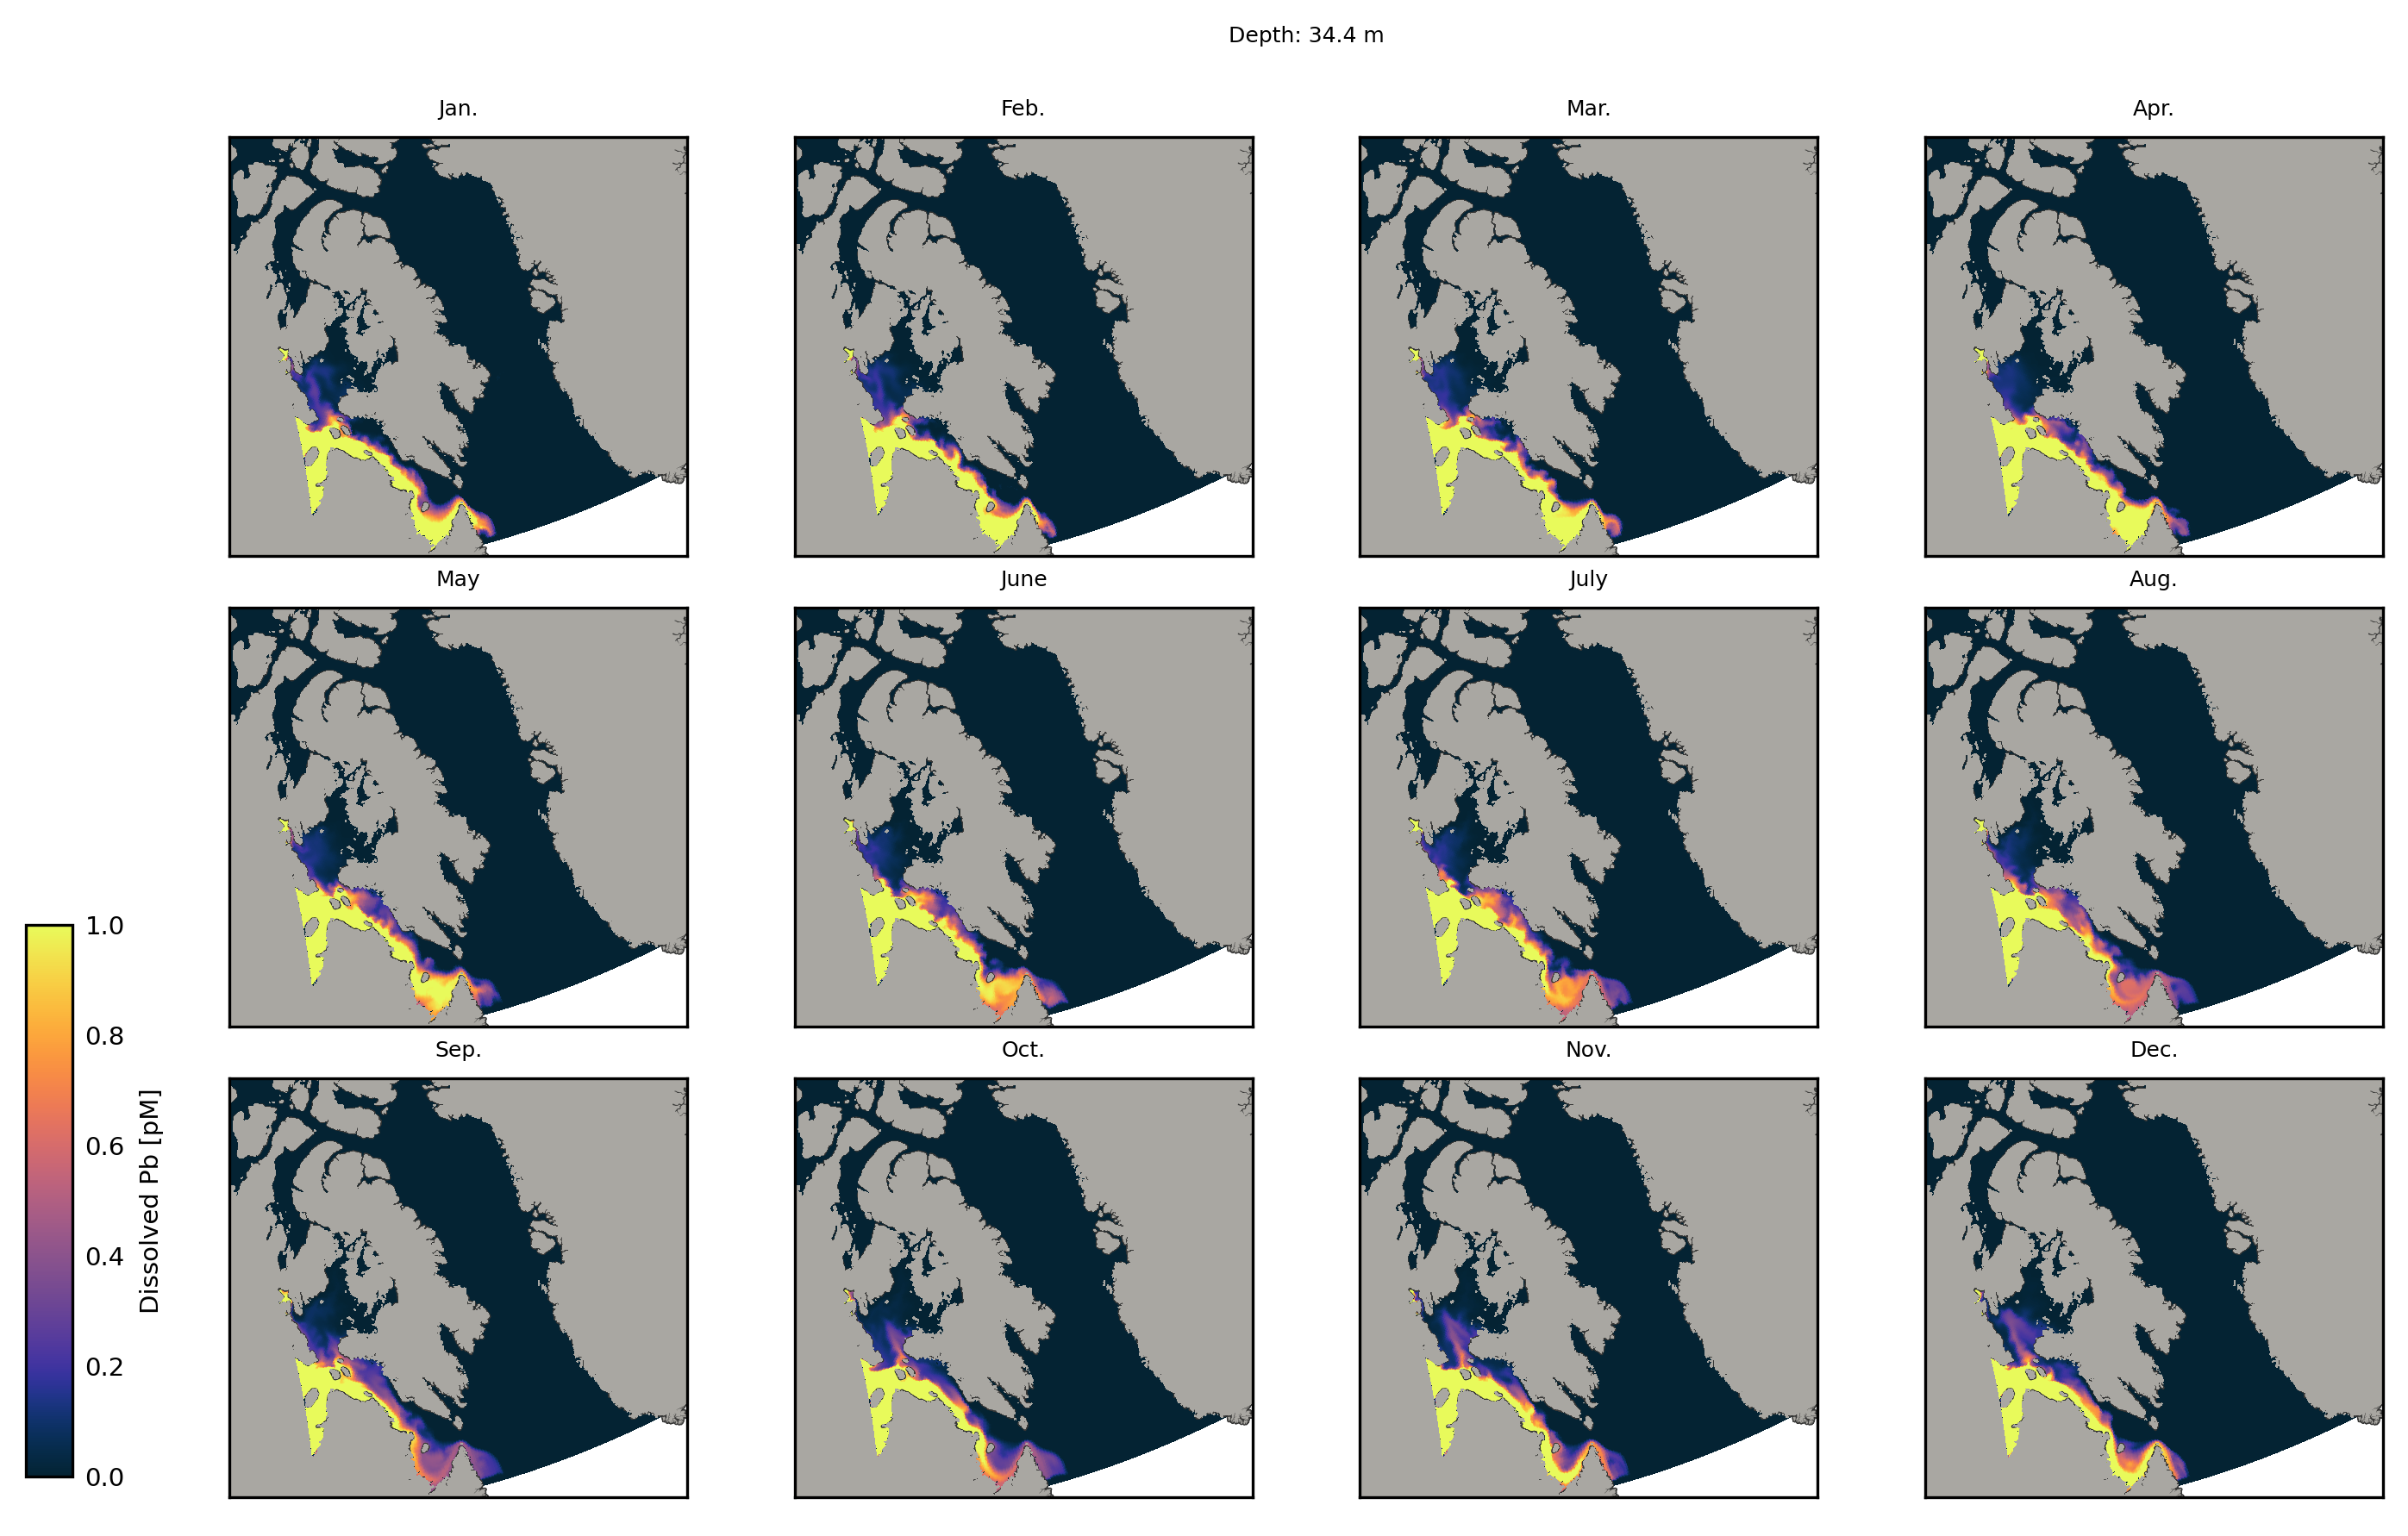

In [7]:
year   = 2004
layer  = 15

fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb12-LS.pickle','rb'))
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

for month in range(1,13):
    folder1 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-Hudson-Bay-{year}_20230217/'
    folder2 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-Labrador-Sea-{year}_20230217/'
    comp1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    comp2   = xr.open_dataset(f'{folder2}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    dpb1    = comp1['dissolpb'].values[0,:,:,:]
    dpb2    = comp2['dissolpb'].values[0,:,:,:]
    
    CB = plot_layer(ax.ravel()[month-1], dpb1-dpb2, layer, vmin=0, vmax=1, month=month_list[month-1])
  
fig.suptitle(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6, y=1.05)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([-0.05, 0.05, 0.02, 0.38]);
CBar   = plt.colorbar(CB, cax=cbaxes); 
CBar.set_label('Dissolved Pb [pM]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

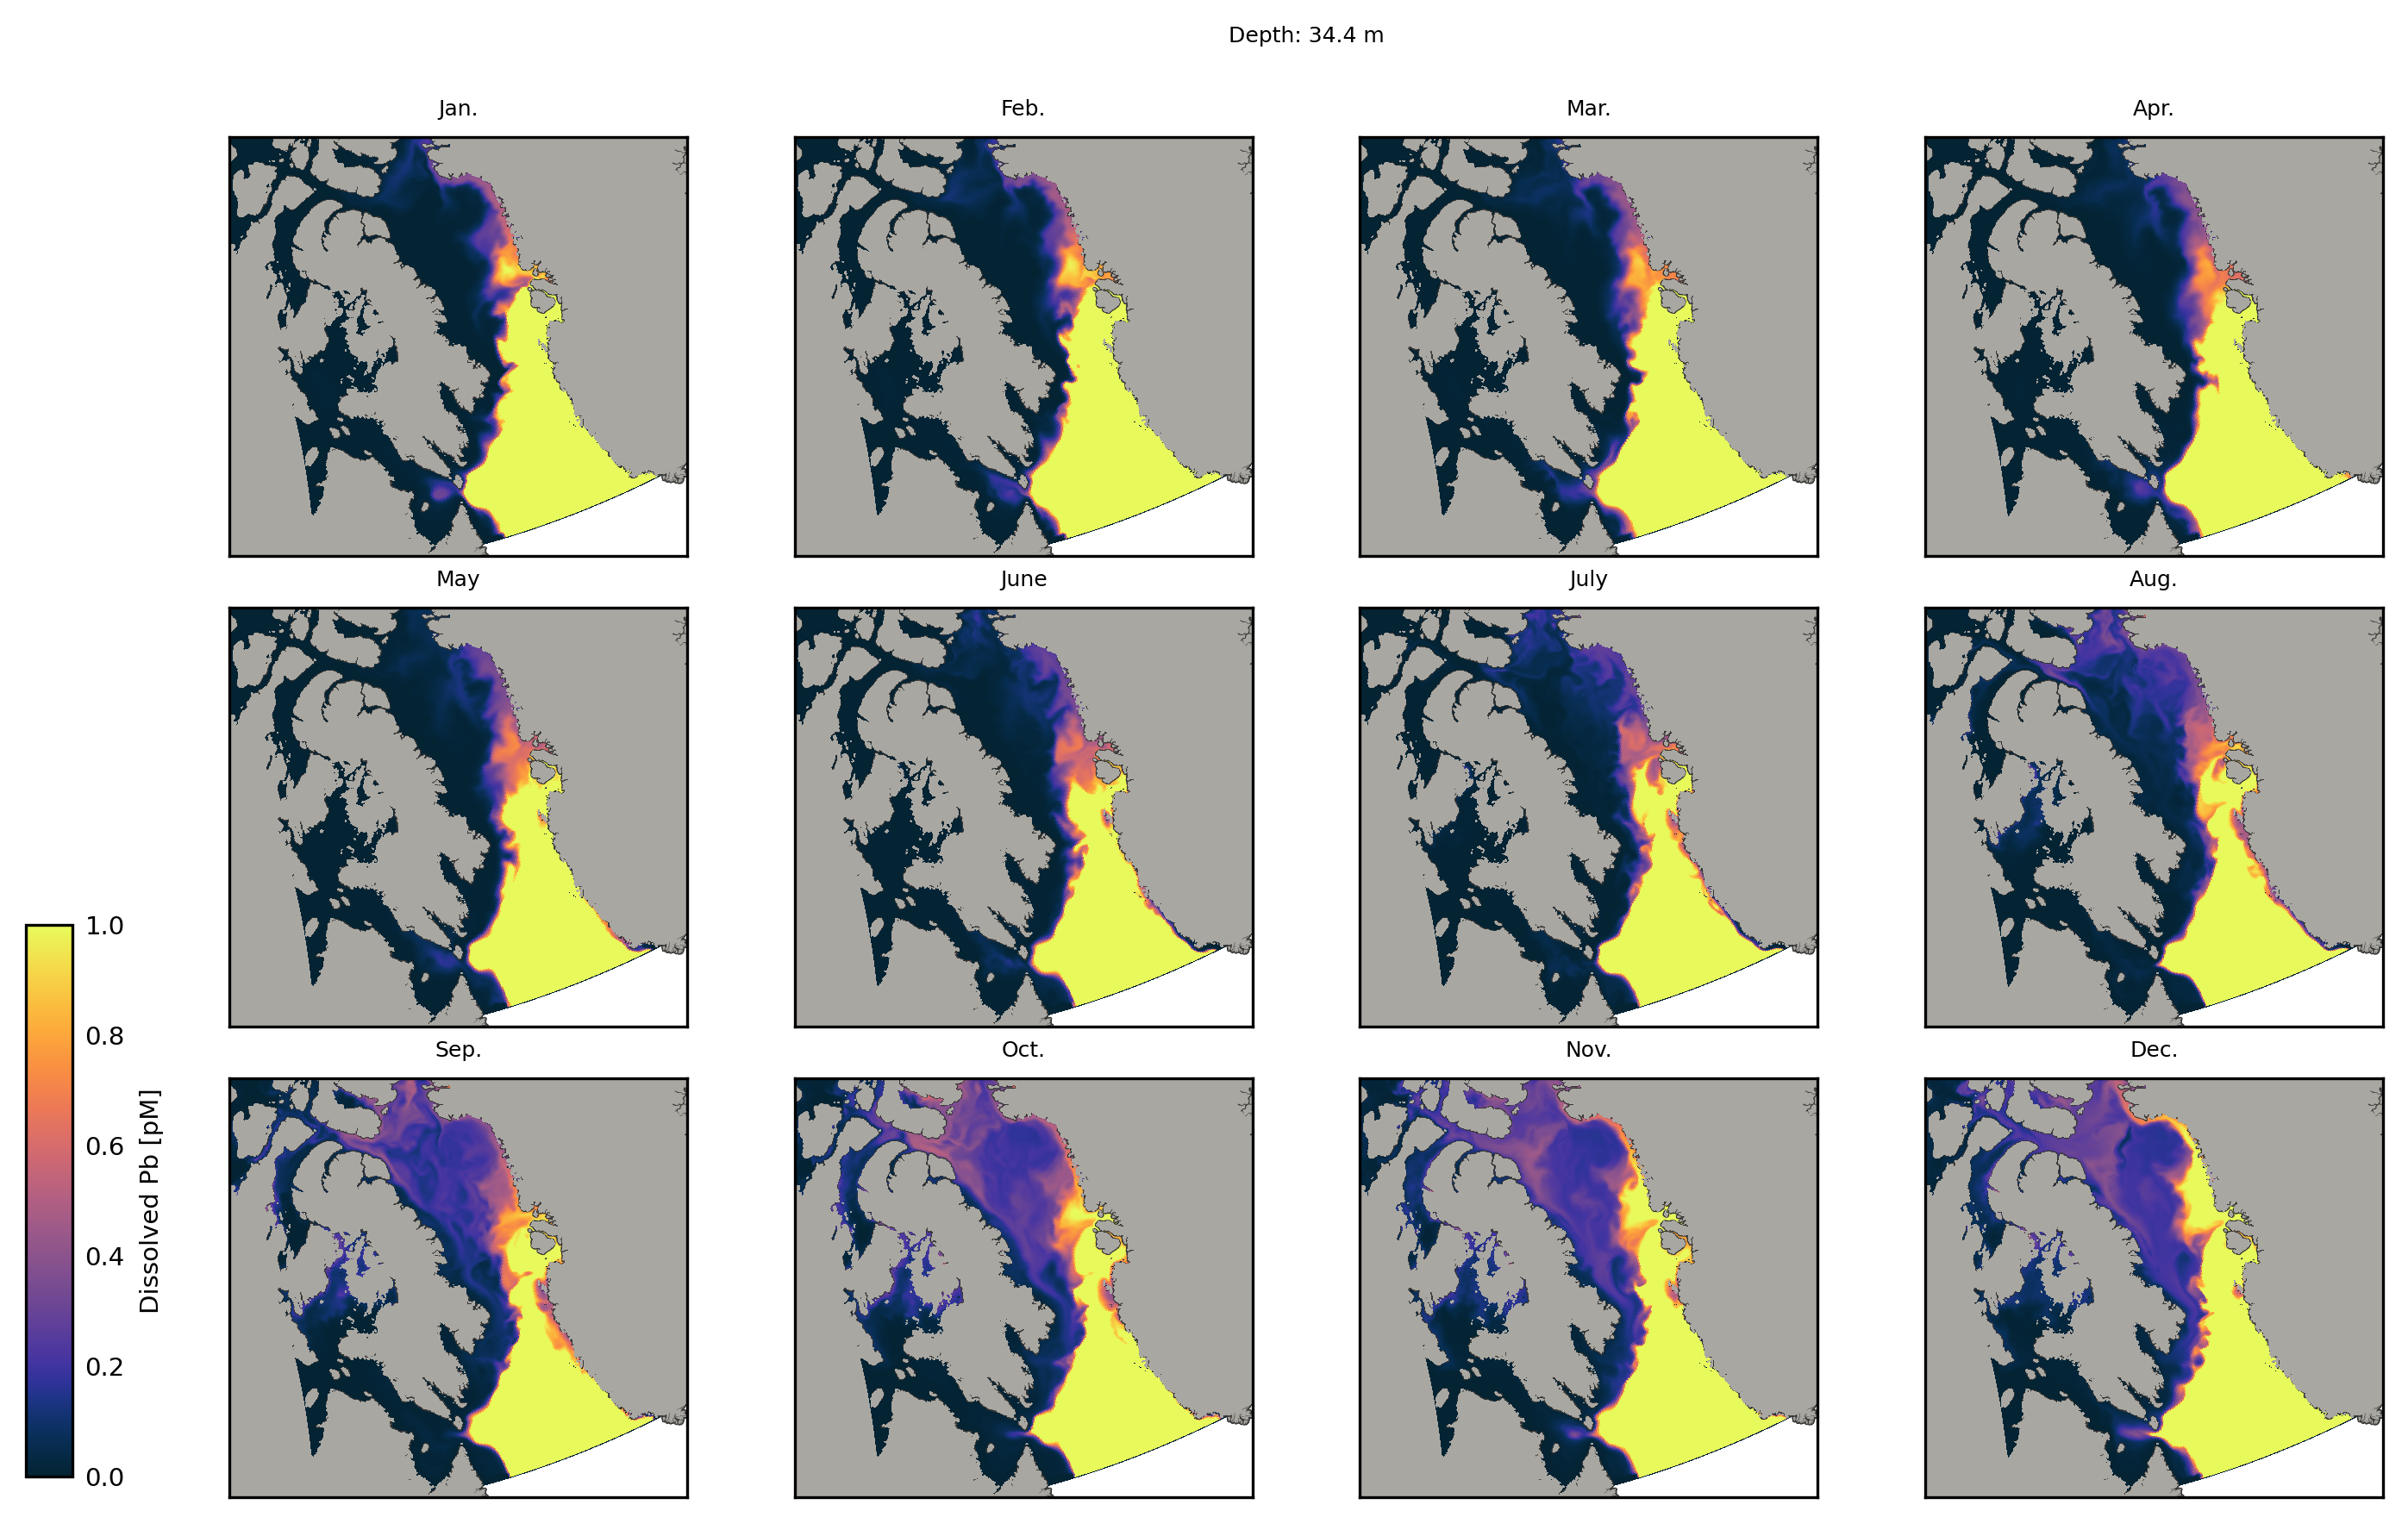

In [10]:
year   = 2004
layer  = 15

fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb12-LS.pickle','rb'))
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

for month in range(1,13):
    folder1 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-reference-{year}_20230221/'
    folder2 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-Labrador-Sea-{year}_20230222/'
    comp1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    comp2   = xr.open_dataset(f'{folder2}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    dpb1    = comp1['dissolpb'].values[0,:,:,:]
    dpb2    = comp2['dissolpb'].values[0,:,:,:]
    
    CB = plot_layer(ax.ravel()[month-1], dpb2-dpb1, layer, vmin=0, vmax=1, month=month_list[month-1])
  
fig.suptitle(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6, y=1.05)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([-0.05, 0.05, 0.02, 0.38]);
CBar   = plt.colorbar(CB, cax=cbaxes); 
CBar.set_label('Dissolved Pb [pM]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

In [23]:
print(np.amax(dpb2[19,:,:]-dpb1[19,:,:])*1e12)

0.035552073437972176


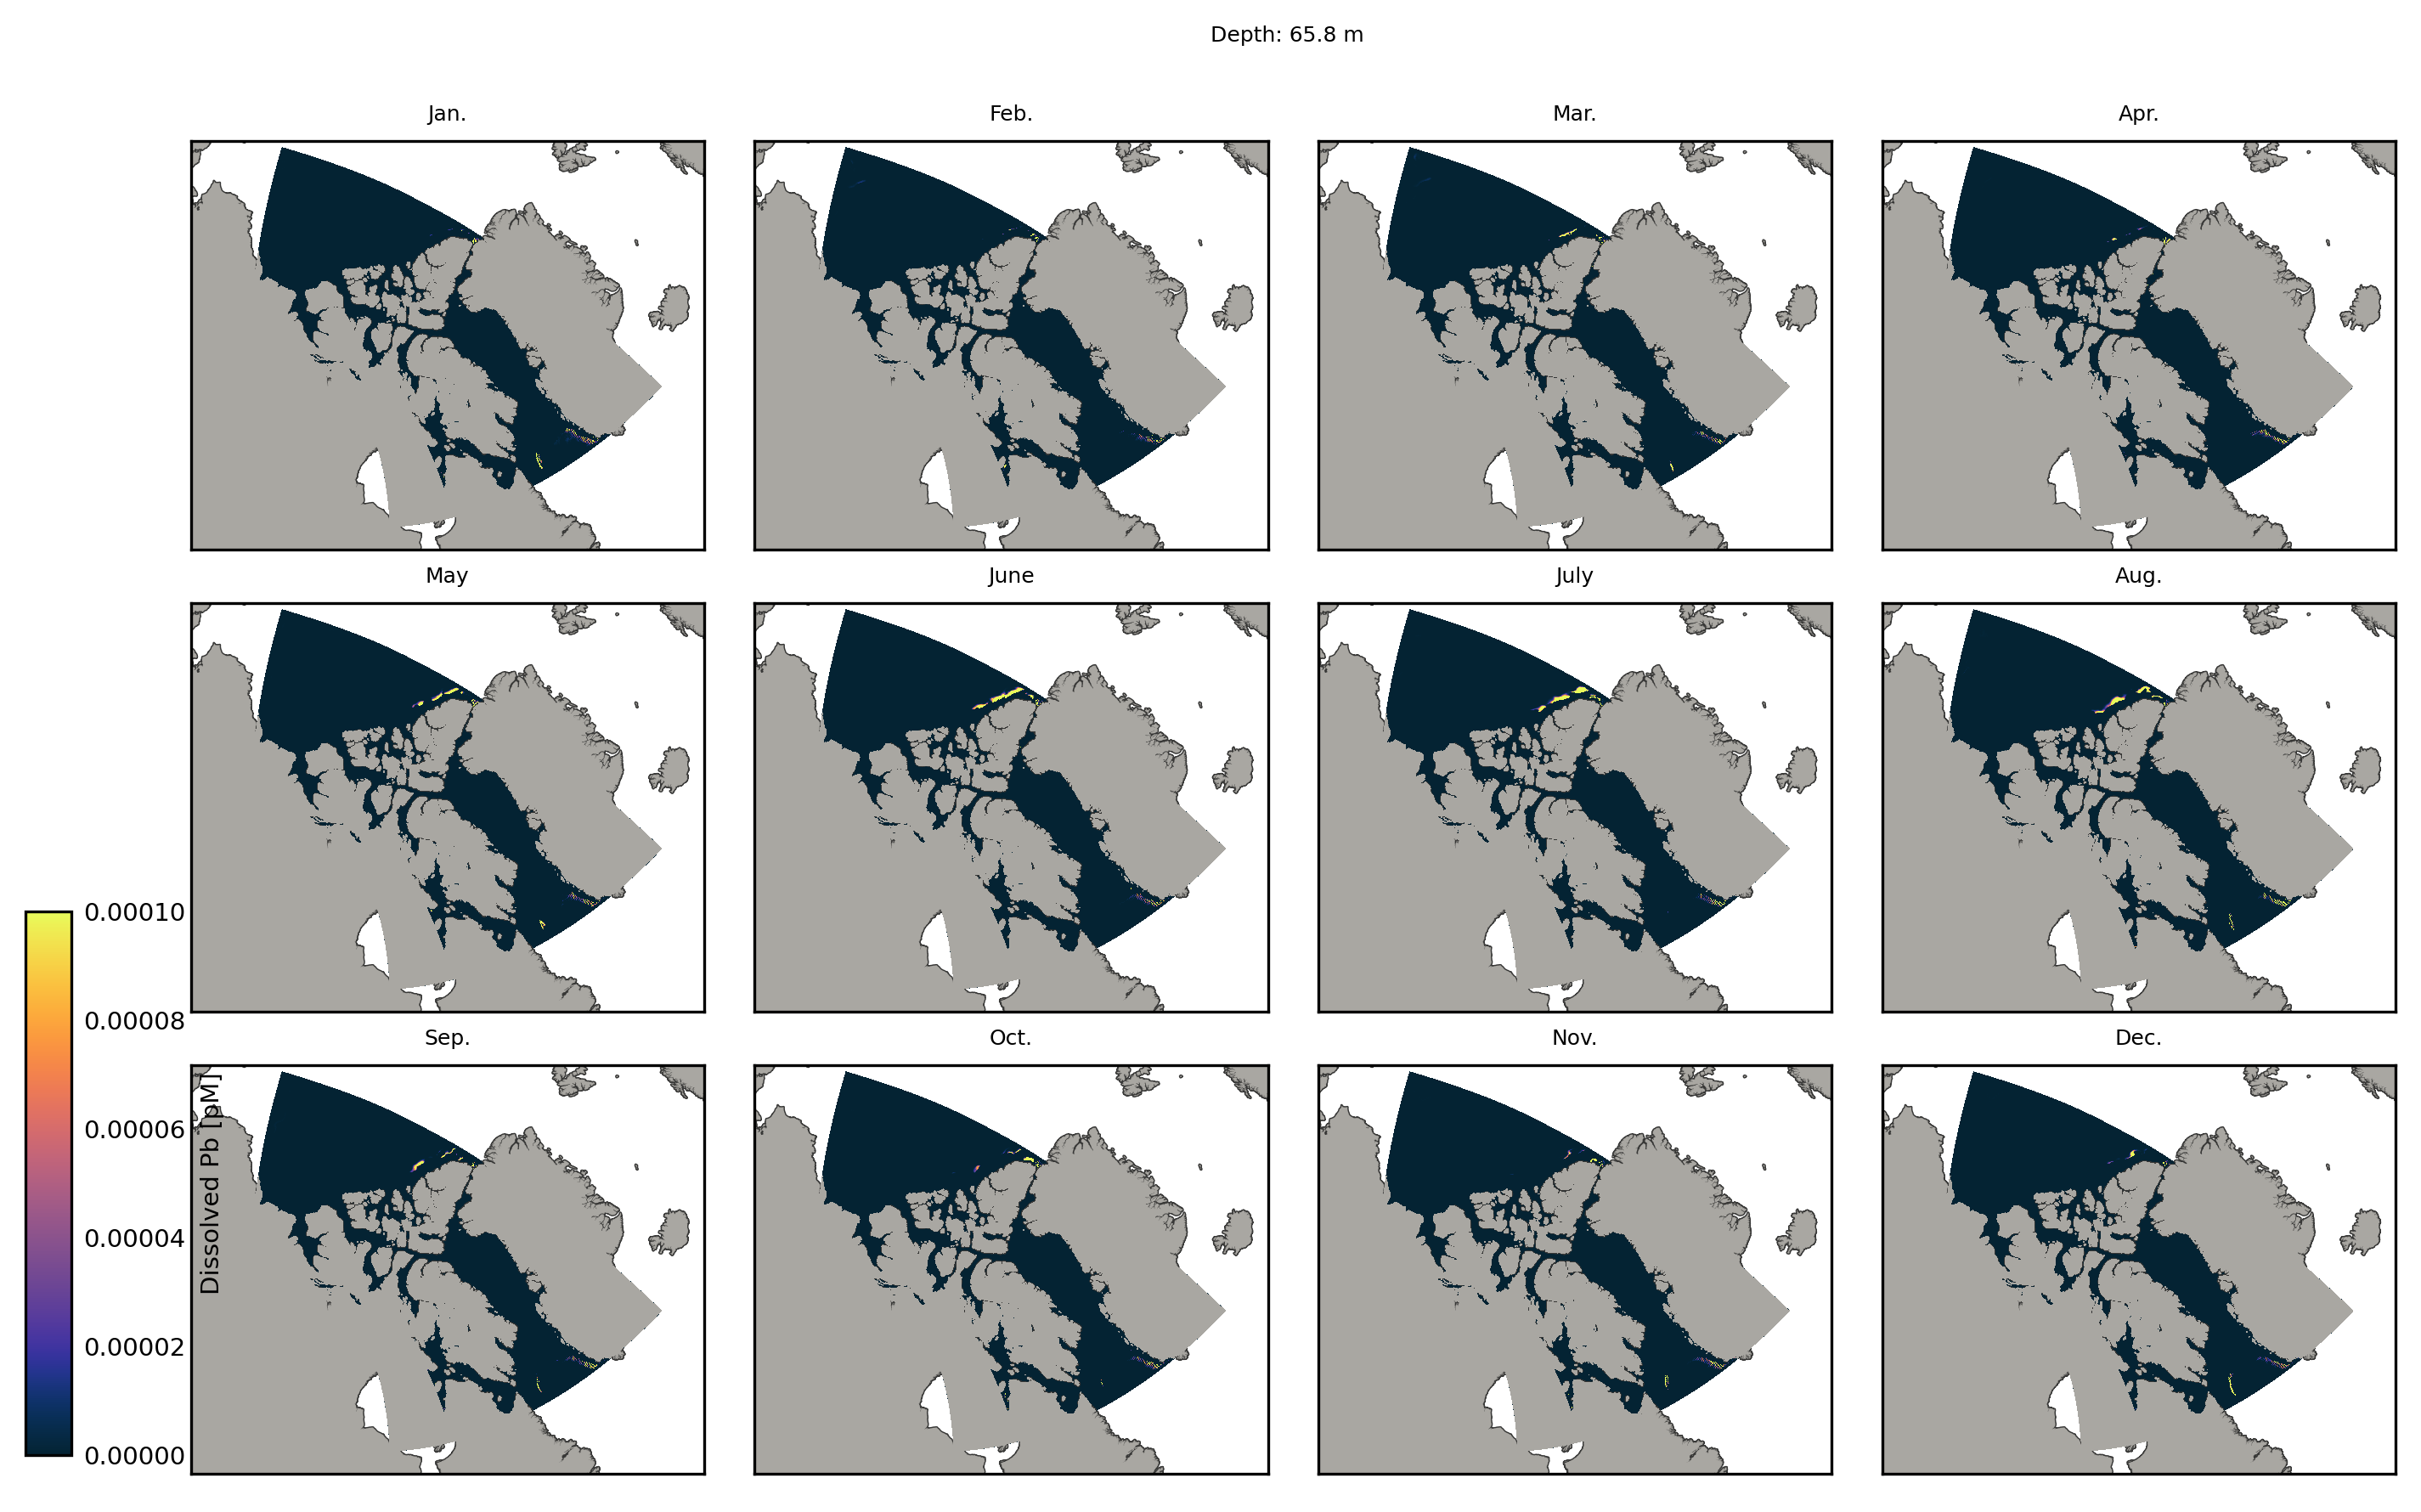

In [26]:
year   = 2015
layer  = 19

fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb12.pickle','rb'))
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

for month in range(1,13):
    folder1 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-reference-{year}_20230221/'
    folder2 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-noresus-{year}_20230221/'
    comp1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    comp2   = xr.open_dataset(f'{folder2}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    dpb1    = comp1['dissolpb'].values[0,:,:,:]
    dpb2    = comp2['dissolpb'].values[0,:,:,:]
    
    CB = plot_layer(ax.ravel()[month-1], dpb2-dpb1, layer, vmin=0, vmax=1e-4, month=month_list[month-1])
  
fig.suptitle(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6, y=1.05)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([-0.05, 0.05, 0.02, 0.38]);
CBar   = plt.colorbar(CB, cax=cbaxes); 
CBar.set_label('Dissolved Pb [pM]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

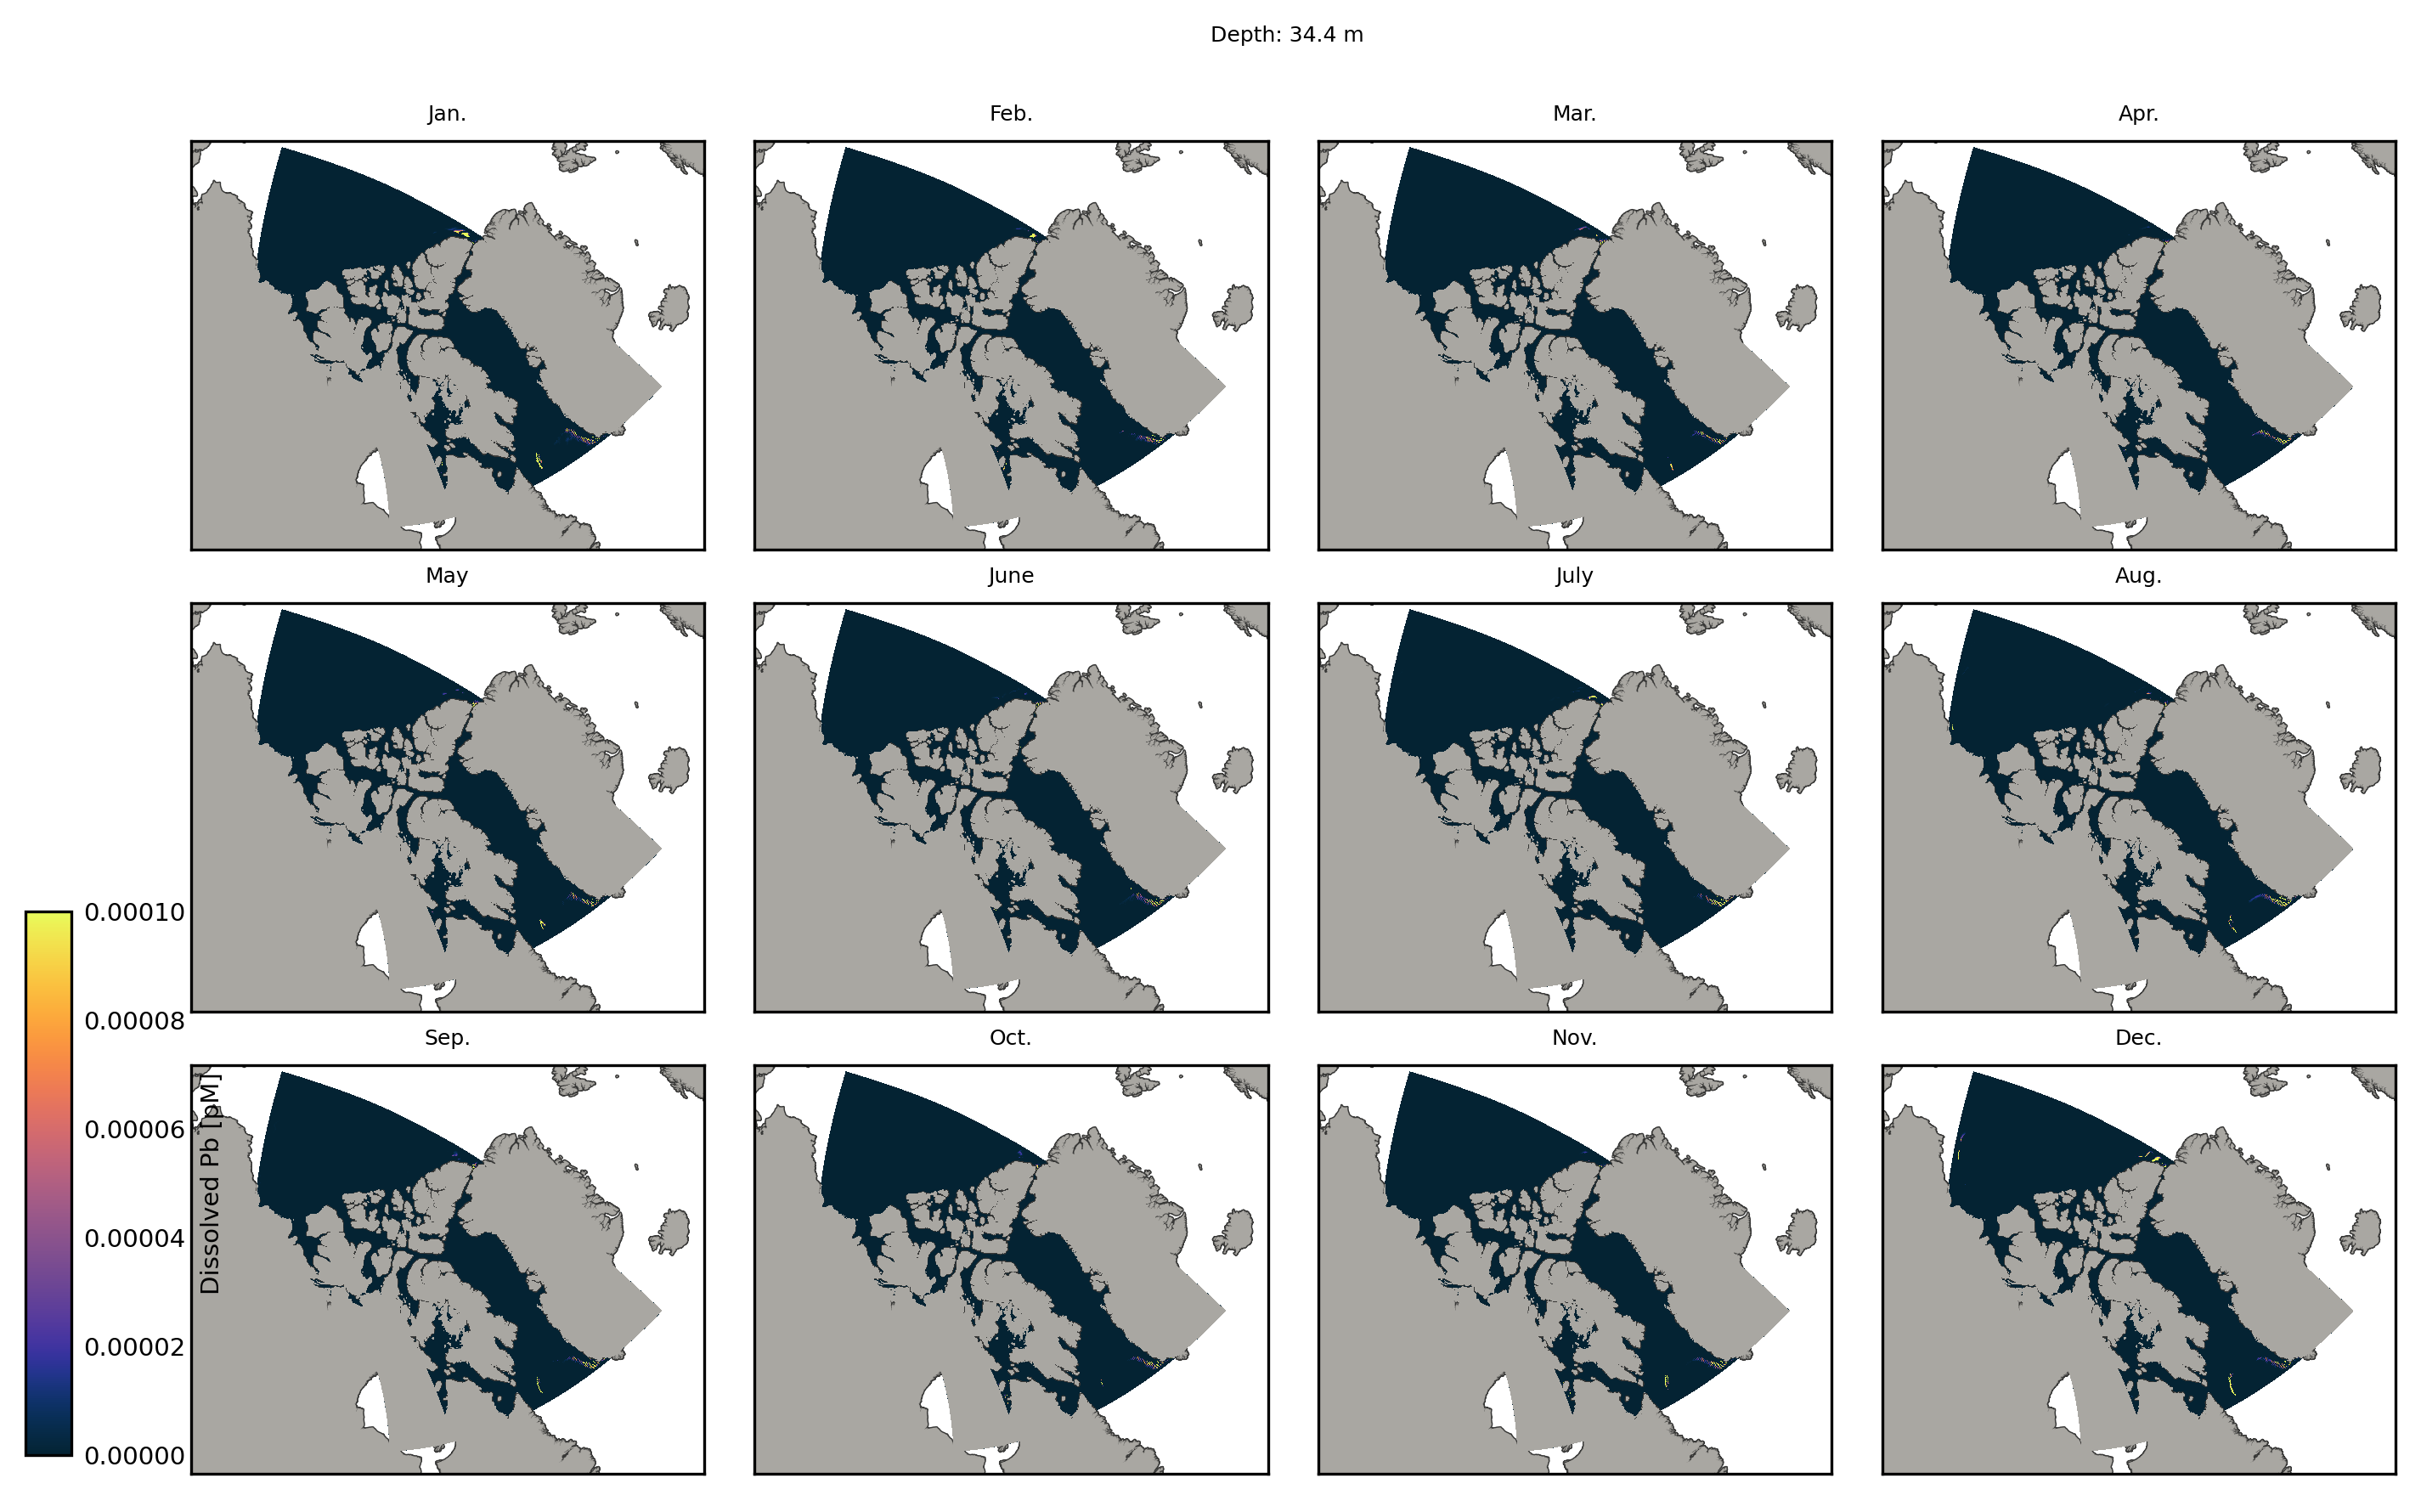

In [28]:
year   = 2015
layer  = 15

fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb12.pickle','rb'))
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

for month in range(1,13):
    folder1 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-reference-{year}_20230221/'
    folder2 = f'/data/brogalla/run_storage/Pb-tuning-202302/Pb-noresus-{year}_20230221/'
    comp1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    comp2   = xr.open_dataset(f'{folder2}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    dpb1    = comp1['dissolpb'].values[0,:,:,:]
    dpb2    = comp2['dissolpb'].values[0,:,:,:]
    
    CB = plot_layer(ax.ravel()[month-1], dpb2-dpb1, layer, vmin=0, vmax=1e-4, month=month_list[month-1])
  
fig.suptitle(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6, y=1.05)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([-0.05, 0.05, 0.02, 0.38]);
CBar   = plt.colorbar(CB, cax=cbaxes); 
CBar.set_label('Dissolved Pb [pM]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)